In [1]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('..')
from src.mod_plot import *
from src.mod_stat import *
from src.mod_spectral import *
from src.mod_interp import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Variables

In [32]:
time_min = '2019-01-01'                                        # time min for analysis
time_max = '2019-12-31'                                        # time max for analysis
output_dir = '../results'                                      # output directory path
os.system(f'mkdir -p {output_dir}')
method_name='DUACS'
stat_output_filename = f'{output_dir}/stat_uv_duacs_geos.nc'   # output statistical analysis filename
psd_output_filename = f'{output_dir}/psd_uv_duacs_geos.nc'     # output spectral analysis filename
segment_lenght = np.timedelta64(40, 'D')                      # spectral parameter: drifters segment lenght in days to consider in the spectral analysis

## [Sea Surface currents from Drifters database](https://doi.org/10.17882/86236)

In [33]:
filenames_drifters = sorted(glob('../data/independent_drifters/uv_drifters_*.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='time')
ds_drifter = ds_drifter.where((ds_drifter.time >= np.datetime64(time_min)) & (ds_drifter.time <=  np.datetime64(time_max)), drop=True)
ds_drifter

<xarray.Dataset>
Dimensions:    (time: 2156405)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-12-31
    latitude   (time) float32 dask.array<chunksize=(5559,), meta=np.ndarray>
    longitude  (time) float32 dask.array<chunksize=(5559,), meta=np.ndarray>
Data variables:
    EWCT       (time) float32 dask.array<chunksize=(5559,), meta=np.ndarray>
    NSCT       (time) float32 dask.array<chunksize=(5559,), meta=np.ndarray>
    sensor_id  (time) float64 dask.array<chunksize=(5559,), meta=np.ndarray>
Attributes: (12/46)
    data_type:                   OceanSITES trajectory data
    format_version:              2.0
    platform_code:               116275
    date_update:                 2020-10-13T12:17:40Z
    institution:                 AOML
    institution_edmo_code:       1799
    ...                          ...
    deployment_lat:              -58.44
    last_longitude_observation:  82.75
    last_latitude_observation:   -18.49
    date_drog_lost:              2017-01-21T03:37:00Z
    death_type:                  stop transmitting
    last_date_observation:       2019-01-16T01:51:00Z

In [35]:
ds_drifter['longitude'].values.shape

(2156405,)

# Data global distribution 

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


# Supposons que les variables de longitude et latitude soient nommées 'longitude' et 'latitude'
longitude = ds_drifter['longitude'].values
latitude = ds_drifter['latitude'].values

# Définir les bins pour la longitude et la latitude à l'échelle globale
lon_bins = np.linspace(-180, 180, 100)  # 100 bins entre -180° et 180°
lat_bins = np.linspace(-90, 90, 50)     # 50 bins entre -90° et 90°

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude, longitude, bins=[lat_bins, lon_bins]
)

# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin']
)

Text(0, 0.5, 'Number of data')

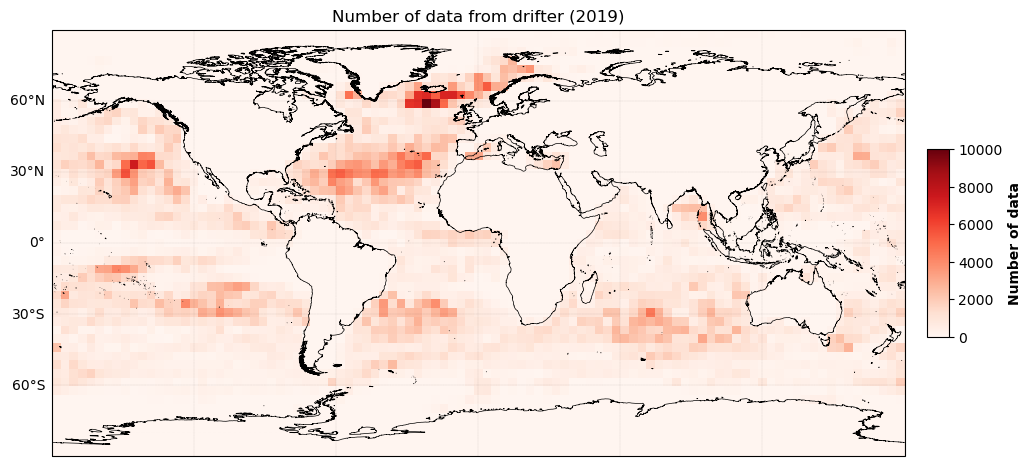

In [ ]:

fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,7.5))



p0 = axs.pcolormesh(lon_bins, lat_bins, histogram_da, cmap='Reds',vmax=10000)

axs.set_title('Number of data from drifter (2019)')

axs.coastlines(resolution='10m', lw=0.5)
# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')
# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}


cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
cbar = fig.colorbar(p0, cax=cax, orientation='vertical')
cax.set_ylabel('Number of data', fontweight='bold')



# 2023

In [72]:
filenames_drifters = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/independent_drifters/2023/merged_drifters_2023.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='time')

In [68]:
time_min = '2023-01-01'                                        # time min for analysis
time_max = '2023-12-31'                                        # time max for analysis
output_dir = '../results'                                      # output directory path
os.system(f'mkdir -p {output_dir}')
method_name='DUACS'
stat_output_filename = f'{output_dir}/stat_uv_duacs_geos.nc'   # output statistical analysis filename
psd_output_filename = f'{output_dir}/psd_uv_duacs_geos.nc'     # output spectral analysis filename
segment_lenght = np.timedelta64(40, 'D')                      # spectral parameter: drifters segment lenght in days to consider in the spectral analysis

filenames_drifters = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/independent_drifters/2023/merged_drifters_2023.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='time')
ds_drifter = ds_drifter.where((ds_drifter.TIME >= np.datetime64(time_min)) & (ds_drifter.TIME <=  np.datetime64(time_max)), drop=True)
ds_drifter


<xarray.Dataset>
Dimensions:     (time: 1, trajectory: 1459, TIME: 6961, DEPTH: 1)
Coordinates:
  * TIME        (TIME) datetime64[ns] 2023-01-01 ... 2023-10-18
    TRAJECTORY  (trajectory) |S7 dask.array<chunksize=(1459,), meta=np.ndarray>
    DEPH        (trajectory, TIME, DEPTH) float32 dask.array<chunksize=(1459, 6961, 1), meta=np.ndarray>
    LATITUDE    (trajectory, TIME) float32 dask.array<chunksize=(1459, 6961), meta=np.ndarray>
    LONGITUDE   (trajectory, TIME) float32 dask.array<chunksize=(1459, 6961), meta=np.ndarray>
Dimensions without coordinates: time, trajectory, DEPTH
Data variables:
    EWCT        (time, trajectory, TIME, DEPTH) float32 dask.array<chunksize=(1, 1459, 6961, 1), meta=np.ndarray>
    NSCT        (time, trajectory, TIME, DEPTH) float32 dask.array<chunksize=(1, 1459, 6961, 1), meta=np.ndarray>
Attributes: (12/55)
    platform_code:                  1401829
    platform_name:                  Drifting Buoy
    wmo_platform_code:              1401829
    ices_platform_code:              
    coriolis_platform_code:         1401829
    site_code:                       
    ...                             ...
    history:                        Creation
    data_assembly_center:           CLS
    publisher_email:                cmems-service@ifremer.fr
    publisher_name:                 Copernicus Marine Service
    publisher_url:                  https://marine.copernicus.eu/ http://www....
    publisher_institution:          Ifremer

In [69]:

# Supposons que les variables de longitude et latitude soient nommées 'longitude' et 'latitude'
longitude = ds_drifter['LONGITUDE'].values
longitude = longitude[~np.isnan(longitude)].flatten()
latitude = ds_drifter['LATITUDE'].values
latitude = latitude[~np.isnan(latitude)].flatten()

# Définir les bins pour la longitude et la latitude à l'échelle globale
lon_bins = np.linspace(-180, 180, 100)  # 100 bins entre -180° et 180°
lat_bins = np.linspace(-90, 90, 50)     # 50 bins entre -90° et 90°

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude, longitude, bins=[lat_bins, lon_bins]
)

# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin']
)

Text(0, 0.5, 'Number of data')

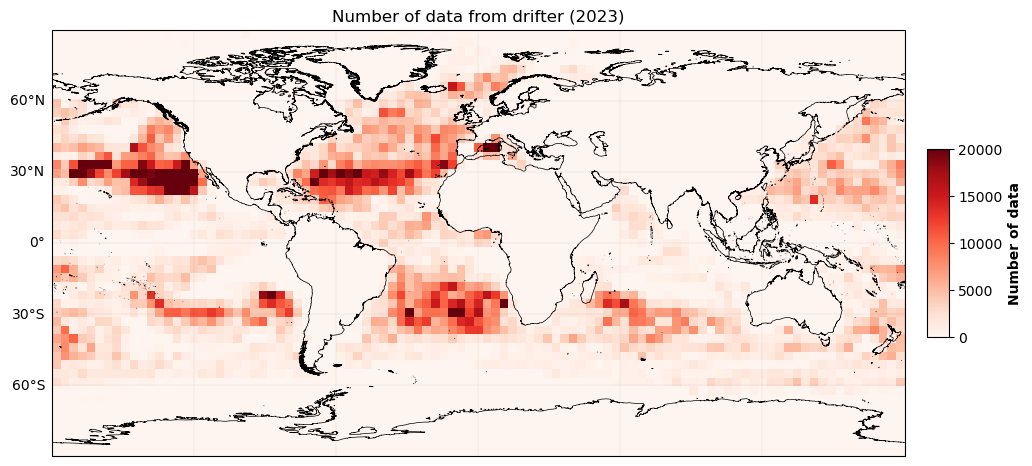

In [71]:

fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,7.5))



p0 = axs.pcolormesh(lon_bins, lat_bins, histogram_da, cmap='Reds',vmax=20000)

axs.set_title('Number of data from drifter (2023)')

axs.coastlines(resolution='10m', lw=0.5)
# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')
# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.1, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}


cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
cbar = fig.colorbar(p0, cax=cax, orientation='vertical')
cax.set_ylabel('Number of data', fontweight='bold')